**Imports**

In [1]:

import matplotlib.pyplot as plt
import pyplotterlib.standard.plotters as ppl


**1) Calling matplotlib post-plotting**

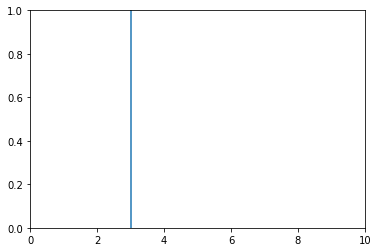

In [2]:
blankPlotter = ppl.LinePlotter()
unused = blankPlotter.createPlot(xLimit=[0,10])
plt.gca().axvline(x=3)


**2) Appending a command + option object to the plotter instance**

In [3]:
import pyplotterlib.core.plot_command as pltCmdCoreHelp
import pyplotterlib.core.plot_options as pltOptCoreHelp
import pyplotterlib.core.serialization.register as serRegHelp

#Create option object
@serRegHelp.registerForSerialization()
class VertLinePlotOption(pltOptCoreHelp.FloatPlotOption):
    def __init__(self,name=None, value=None):
        self.name = "vertLinePos"
        self.value = value


#Create command object. Note that neither _name or _description are strictly required
@serRegHelp.registerForSerialization()
class DrawVertLine(pltCmdCoreHelp.PlotCommand):
    def __init__(self):
        self._name = "drawVertLine"
        self._description = "Draws a vertical line at a position given by the vertLinePos option"
    
    def execute(self, plotterInstance):
        linePos = getattr(plotterInstance.opts,"vertLinePos").value
        if linePos is None:
            return None
        plt.gca().axvline(x=linePos)
        

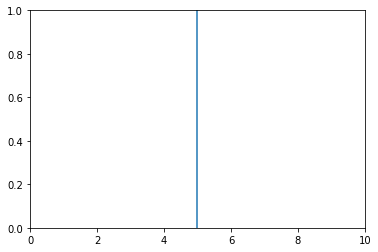

In [4]:
moddedPlotter = ppl.LinePlotter()
moddedPlotter.addOptionsObjs([VertLinePlotOption()])
moddedPlotter.appendCommandObjs([DrawVertLine()])

moddedPlotter.setOptionVals({"xLimit":[0,10],"vertLinePos":5})
unused = moddedPlotter.createPlot()


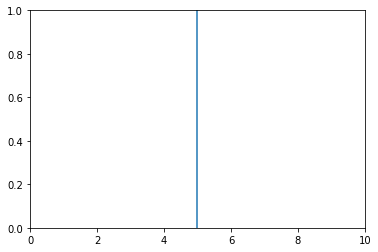

In [5]:
ppl.writePlotterToFile(moddedPlotter, "_temp_file.json")
reReadPlotter = ppl.readPlotterFromFile("_temp_file.json")
unused = reReadPlotter.createPlot()

**3) Demonstrate use of an imported plotter**

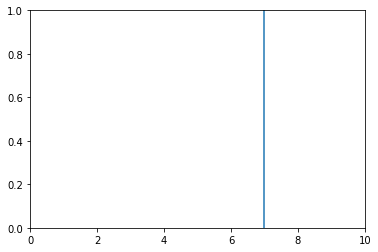

In [6]:
import extending_builtin_example_plotter as extPlotterHelp
currPlotter = extPlotterHelp.ExtendedLinePlotter(xLimit=[0,10],vertLinePos=7)
unused = currPlotter.createPlot()

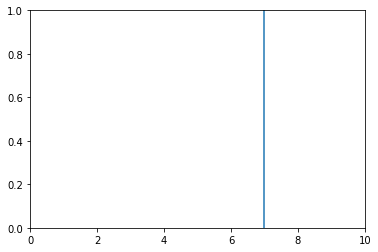

In [7]:
ppl.writePlotterToFile(currPlotter,"_temp_file.json")
reReadPlotter = ppl.readPlotterFromFile("_temp_file.json")
unused = reReadPlotter.createPlot()